# Формирование модели монетизации.

Данное исследование проводится для формирования модели монетизации мобильной игры. 

## Материалы:
* [Презентация](https://docs.google.com/presentation/d/1as_ljyiZGlH1v82b-2nVjGYQMGpmMwJFVAmcS8G6LbY/edit?usp=sharing)
* [Дашборд](https://public.tableau.com/app/profile/georgy8624/viz/_16711380449100/Dashboard2?publish=yes)
* [Дашборд](https://public.tableau.com/app/profile/georgy8624/viz/_16711398569360/Dashboard1?publish=yes)

**Цель исследования**:

На основе различных сценариев прохождения игры выявить самый поздний этап, на котором затраты на привлечения пользователя окупаются.

**Ход исследования**:
Данные о пользовательских активностях в игре возьмем из файла: `game_actions.csv`. В датасете представлены данные по игре пользователей на первом уровне. Завершение первого уровня требует от игрока выполнения одного из двух условий:

- Победа над первым врагом
- Реализация проекта - разработка орбитальной сборки спутников

Данные о рекламе: `ad_costs.csv` и `user_source.csv`. О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор и предобработка данных. 

Проверим данные на ошибки и оценим их влияние на исследование. Затем, на этапе предобработки выявим возможность исправить самые критичные ошибки данных.

Затем проведем исследовательский анализ данных. На этом этапе определим:
1. Сколько пользователей в логах?
2. Сколько пользователей доходят до реализации проекта?
3. Сколько пользователей доходят до 2 уровня, победив другого игрока?
4. Cтоимость привлечения одного пользователя.
5. Окупаемость рекламы в целом, с разбивкой на источники. 
6. Анализ конверсии и удержания с разбивкой по источникам.

После этого проверим несколько **гипотез**:
1. Время прохождения уровня между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком, различны.
2. Время прохождения уровня между пользователями, привлеченных из разных рекламных источников, различны.
Таким образом, исследование пройдёт в несколько этапов:
 1. Изучение общей информации.
 2. Предобработка данных.
 3. Анализ данных.
 4. Проверка статистических гипотез.
 5. Общий вывод. 
 6. Презентация.

### Формирование модели монетизации.

_____
###### Данное исследование разделим на несколько частей.

##### Часть 1. Изучение общей информации:
* [1. Изученеие файлов с данными, получение общей информации, загрузка библиотек.](#1-bullet)
##### Часть 2. Предобработка данных:
* [1. Приведение данных к нужным типам.](#2-bullet)
* [2. Нахождение и ликвидация пропусков.](#3-bullet)
* [3. Нахождение дубликатов.](#4-bullet)
* [4. Нахождение и исправление аномалий и ошибок.](#5-bullet)
##### Часть 3. Исследовательский анализ данных:
* [1. Подсчет процента пользователей, дошедших до реализации проекта.](#6-bullet)
* [2. Подсчет процента пользователей, победивших другого игрока.](#7-bullet)
* [3. Анализ затрат на рекламу.](#8-bullet)
* [4. Расчет стоимости привлечения одного пользователя.](#9-bullet)
* [5. Оценка окупаемости рекламы для привлечения пользователей.](#10-bullet)
* [6. Конверсия пользователей, дошедших до 2 уровня, в разрезе по каналам привлечения.](#11-bullet)
##### Часть 4. Проверка гипотез:
* [1. Проверка статистических гипотез.](#12-bullet)

##### Общий вывод

## Изучение общей информации.

<a id='1-bullet'></a>
### Изученеие файлов с данными, получение общей информации, загрузка библиотек.

In [1]:
import pandas as pd #импорт библиотеки Pandas
import matplotlib.pyplot as plt #импорт библиотеки matplotlib.pyplot
import numpy as np #импорт библиотеки numpy
from scipy import stats as st #импорт библиотеки stats

Загрузим датасеты для анализа данных.

In [2]:
game_actions = pd.read_csv("D://Programs//game_actions.csv")

In [3]:
game_actions.info() #получение общей информацииgame_actions

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   event_datetime  135640 non-null  object
 1   event           135640 non-null  object
 2   building_type   127957 non-null  object
 3   user_id         135640 non-null  object
 4   project_type    1866 non-null    object
dtypes: object(5)
memory usage: 5.2+ MB


Таблица `game_actions`:
- `event_datetime` — время события;
- `event` — одно из трёх событий:
    1. `building` — объект построен,
    2. `finished_stage_1` — первый уровень завершён,
    3. `project` — проект завершён;
- `building_type` — один из трёх типов здания:
    1. `assembly_shop` — сборочный цех,
    2. `spaceport` — космопорт,
    3. `research_center` — исследовательский центр;
- `user_id` — идентификатор пользователя;
- `project_type` — тип реализованного проекта;

In [4]:
game_actions.head()

,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN


In [5]:
ad_costs = pd.read_csv("D://Programs//ad_costs.csv")

In [6]:
ad_costs.info() #получение общей информации ad_costs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   source  28 non-null     object 
 1   day     28 non-null     object 
 2   cost    28 non-null     float64
dtypes: float64(1), object(2)
memory usage: 800.0+ bytes


Таблица `ad_costs`:
- `day` - день, в который был совершен клик по объявлению
- `source` - источник трафика
- `cost` - стоимость кликов

In [7]:
ad_costs.head(5)

,source,day,cost
0,facebook_ads,2020-05-03,935.882786
1,facebook_ads,2020-05-04,548.354480
2,facebook_ads,2020-05-05,260.185754
3,facebook_ads,2020-05-06,177.982200
4,facebook_ads,2020-05-07,111.766796


In [8]:
user_source = pd.read_csv("D://Programs//user_source.csv")

In [9]:
user_source.info() #получение общей информации user_source

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  13576 non-null  object
 1   source   13576 non-null  object
dtypes: object(2)
memory usage: 212.2+ KB


Таблица `user_source`:
- `user_id` - идентификатор пользователя
- `source` - источников, с которого пришёл пользователь, установивший приложение

In [10]:
user_source.head()

,user_id,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads


## Предобработка данных.

<a id='2-bullet'></a>
### Приведение данных к нужным типам.

Приведем столбцы `event_datetime` в таблице `game_actions` и `day` в таблице `ad_costs` к типу `datetime`

In [11]:
game_actions['event_datetime'] = pd.to_datetime(game_actions['event_datetime'], format= "%Y/%m/%d")

In [12]:
ad_costs['day'] = pd.to_datetime(ad_costs['day'], format= "%Y/%m/%d")

<a id='3-bullet'></a>
### Нахождение и ликвидация пропусков.

In [13]:
game_actions.isna().sum()

event_datetime         0
event                  0
building_type       7683
user_id                0
project_type      133774
dtype: int64

In [14]:
game_actions['event'].unique()

array(['building', 'finished_stage_1', 'project'], dtype=object)

In [15]:
game_actions['building_type'].unique()

array(['assembly_shop', 'spaceport', nan, 'research_center'], dtype=object)

Некоторые пропуски данных в столбце `building_type` объясняются тем, что не все события связаны с постройкой зданий. Посмотрим нет ли пропусков типа постройки в событиях `building`.

In [16]:
game_actions.query('event == "building"').isna().sum()

event_datetime         0
event                  0
building_type          0
user_id                0
project_type      127957
dtype: int64

Пропусков данных в столбце `building_type` в событиях `building` не оказалось.

In [17]:
ad_costs.isna().sum()

source    0
day       0
cost      0
dtype: int64

In [18]:
user_source.isna().sum()

user_id    0
source     0
dtype: int64

<a id='4-bullet'></a>
### Нахождение дубликатов.

Проверим датасеты на наличие явных дубликатов.

In [19]:
game_actions.duplicated().sum() #нахождение явных дубликатов

1

In [20]:
game_actions = game_actions.drop_duplicates().reset_index(drop=True)
# удаление явных дубликатов (с удалением старых индексов и формированием новых)

In [21]:
ad_costs.duplicated().sum() #нахождение явных дубликатов

0

In [22]:
user_source.duplicated().sum() #нахождение явных дубликатов

0

Проверим также некоторые столбцы на неявные дубликаты.

In [23]:
user_source['source'].unique()

array(['facebook_ads', 'yandex_direct', 'youtube_channel_reklama',
       'instagram_new_adverts'], dtype=object)

In [24]:
game_actions['event'].unique()

array(['building', 'finished_stage_1', 'project'], dtype=object)

In [25]:
game_actions['building_type'].unique()

array(['assembly_shop', 'spaceport', nan, 'research_center'], dtype=object)

In [26]:
game_actions['project_type'].unique()

array([nan, 'satellite_orbital_assembly'], dtype=object)

Неявных дубликатов выявлено не было.

<a id='5-bullet'></a>
### Нахождение и исправление аномалий и ошибок.

In [27]:
ad_costs['cost'].describe()

count     28.000000
mean     271.556321
std      286.867650
min       23.314669
25%       66.747365
50%      160.056443
75%      349.034473
max      969.139394
Name: cost, dtype: float64

Аномально больших трат на релкаму обнаруженно не было.

## Исследовательский анализ данных.

<a id='6-bullet'></a>
### Подсчет процента пользователей, дошедших до реализации проекта.

In [28]:
round(
    game_actions.query('event=="project"')["user_id"].nunique()
    / game_actions["user_id"].nunique()
    * 100,
    0,
)

14.0

14 процентов от всех игроков дошли до 2 уровня игры через реализацию проекта.

<a id='7-bullet'></a>
### Подсчет процента пользователей, победивших другого игрока.

In [29]:
round(
    (
        game_actions.query('event == "finished_stage_1"')["user_id"].nunique()
        - game_actions.query('event == "project"')["user_id"].nunique()
    )
    / game_actions["user_id"].nunique()
    * 100,
    0,
)

29.0

29 процентов от всех игроков дошли до 2 уровня игры через победу другого игрока.

<a id='8-bullet'></a>
### Анализ затрат на рекламу.

Выясним сколько всего было потрачено денег.

In [30]:
ad_costs['cost'].sum()

7603.576986788023

Всего денег на рекламу было потрачено 7603 условных единиц.

Выясним сколько было потрачено денег на каждый источник.

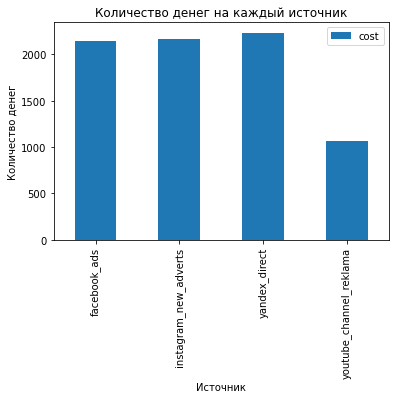

In [31]:
ad_costs.groupby("source").sum().reset_index().plot(
    x="source",
    y="cost",
    kind="bar",
    title="Количество денег на каждый источник",
    xlabel="Источник",
    ylabel="Количество денег",
)
plt.show()

Меньше всего на рекламу было потрачено на источник `youtube_channel_reklama`.

In [32]:
sum_costs=ad_costs.groupby(['day','source']).agg({'cost':'sum'}).reset_index()

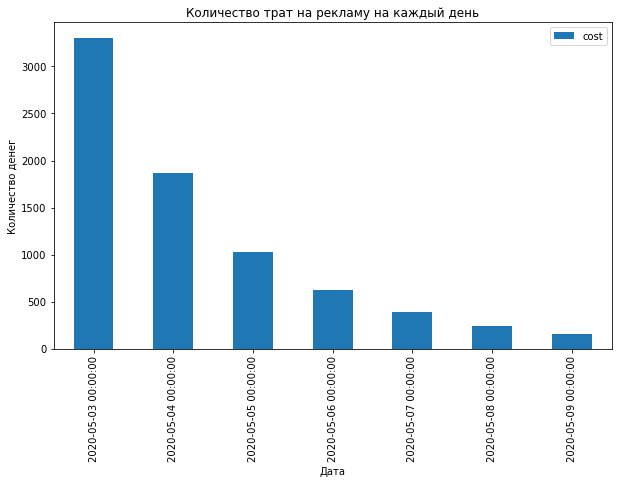

In [33]:
sum_costs.groupby("day").sum().reset_index().plot(
    x="day",
    y="cost",
    kind="bar",
    title="Количество трат на рекламу на каждый день",
    xlabel="Дата",
    ylabel="Количество денег",
    figsize=[10, 6],
)
plt.show()

Расходы на рекламу постепенно снижались.

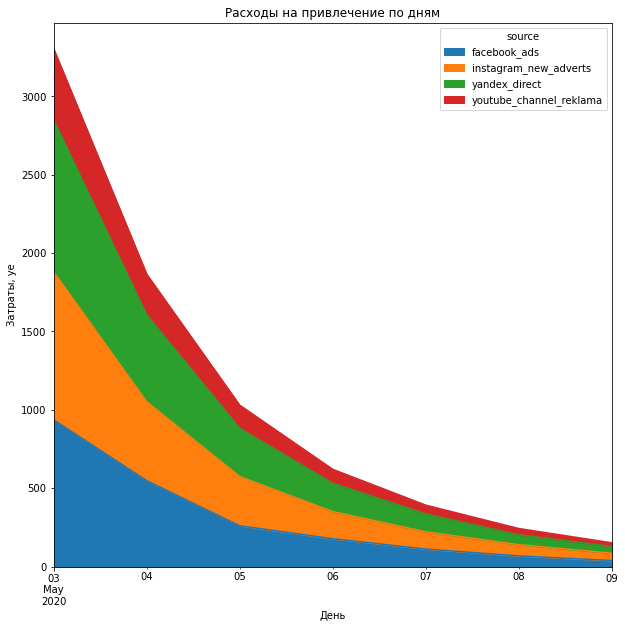

In [34]:
sum_costs.pivot_table(index='day',columns='source',values='cost').plot.area(figsize=(10,10)
                                                                            ,title ='Расходы на привлечение по дням'
                                                                            ,xlabel='День'
                                                                            ,ylabel='Затраты, уе')
plt.show()

Больше всего денег в динамике было потрачено на `facebook_ads`.

<a id='9-bullet'></a>
### Анализ затрат на рекламу.

Узнаем сколько стоило привлечение одного пользователя для игры.

In [35]:
ad_costs['cost'].sum()/user_source['user_id'].nunique()

0.5600749106355349

Стоимость привлчения одного клиента составил 0.56 у.е.

Далее найдем CAC для каждого рекламного источника.

In [36]:
user_source_group = user_source.groupby('source').agg({'user_id':'nunique'})

In [37]:
ad_costs_merge = sum_costs.merge(user_source_group, how='left', on='source')

In [38]:
ad_costs_merge['acquisition_cost'] = ad_costs_merge['cost']/ad_costs_merge['user_id']

In [39]:
ad_costs_merge.head().style.format({'acquisition_cost': '{:.2f}'})

,day,source,cost,user_id,acquisition_cost
0,2020-05-03 00:00:00,facebook_ads,935.882786,2726,0.34
1,2020-05-03 00:00:00,instagram_new_adverts,943.204717,3347,0.28
2,2020-05-03 00:00:00,yandex_direct,969.139394,4817,0.20
3,2020-05-03 00:00:00,youtube_channel_reklama,454.224943,2686,0.17
4,2020-05-04 00:00:00,facebook_ads,548.354480,2726,0.20


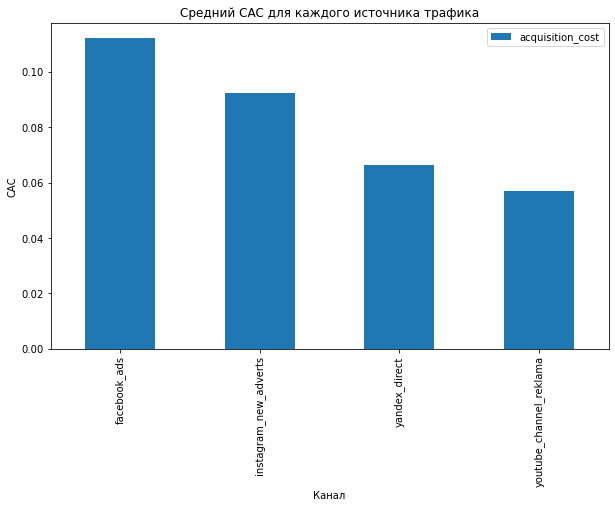

In [40]:
ad_costs_merge.groupby("source").agg({"acquisition_cost": "mean"}).reset_index().plot(
    x="source",
    y="acquisition_cost",
    kind="bar",
    title="Средний CAC для каждого источника трафика",
    xlabel="Канал",
    ylabel="САС",
    figsize=[10, 6],
)
plt.show()

В среднем, стоимость привлечения одного клиента выше всего у канала `facebook_ads` и `instagram_new_adverts`.

<a id='10-bullet'></a>
### Оценка окупаемости рекламы для привлечения пользователей в разрезе по рекламным каналам.

In [41]:
game_stat = game_actions.merge(
        user_source, on='user_id', how='left'
    )

In [42]:
game_stat.head()

,event_datetime,event,building_type,user_id,project_type,source
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,youtube_channel_reklama
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,facebook_ads
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN,instagram_new_adverts
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN,facebook_ads
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN,yandex_direct


In [43]:
game_stat.groupby('user_id').agg({'building_type':'count'}).reset_index()['building_type'].max()

20

In [44]:
game_stat['event_datetime'] = game_stat['event_datetime'].dt.date

In [45]:
result_raw  = game_stat[game_stat['building_type'].isnull() == False]

In [46]:
result_raw = result_raw.groupby(['event_datetime','source']).agg({'building_type':'count'}).reset_index()

In [47]:
result_raw['building_type'] = result_raw['building_type']*0.07

In [48]:
result_raw = result_raw.rename(columns={'building_type': 'revenue','event_datetime': 'day'})

In [49]:
result_raw['day'] = result_raw['day'].astype('datetime64')

In [50]:
result_raw = result_raw.groupby('source').agg({'revenue':'sum'})

In [51]:
result_raw = result_raw.merge(
        ad_costs_merge.groupby('source').agg({'cost':'sum'}), on='source', how='left'
    ).reset_index()

In [52]:
result_raw['roi'] = (result_raw['revenue']-result_raw['cost'])/result_raw['cost']

In [53]:
result_raw

,source,revenue,cost,roi
0,facebook_ads,1829.17,2140.904643,-0.145609
1,instagram_new_adverts,2227.05,2161.441691,0.030354
2,yandex_direct,3152.24,2233.111449,0.411591
3,youtube_channel_reklama,1748.46,1068.119204,0.636952


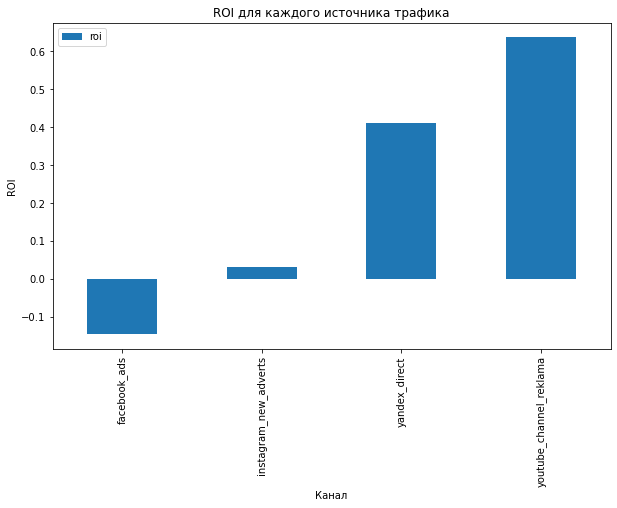

In [54]:
result_raw.plot(
    x="source",
    y="roi",
    kind="bar",
    title="ROI для каждого источника трафика",
    xlabel="Канал",
    ylabel="ROI",
    figsize=[10, 6],
)
plt.show()

Исходя из графика, можно судить, что рекламная компания на `facebook_ads` оказалась убыточной. Самая удачная рекламная компания у источника `youtube_channel_reklama`

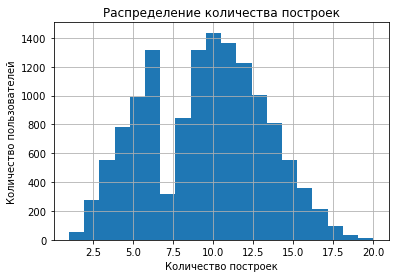

In [55]:
game_stat.groupby('user_id').agg({'building_type':'count'}).reset_index().hist(bins=20)
plt.title('Распределение количества построек')
plt.xlabel('Количество построек')
plt.ylabel('Количество пользователей')
plt.show()

Судя по гистограмме большое количество пользователей, заканчивают игру после 7 построек. Возможно, следует снизить количество показа рекламы, чтобы удерживать большее количество пользователей.

<a id='11-bullet'></a>
### Конверсия пользователей, дошедших до 2 уровня, в разрезе по каналам привлечения.

In [56]:
convers = game_stat[game_stat['event']!='building'].groupby('source').agg({'user_id':'nunique'}).reset_index()

In [57]:
convers["conversion"] = round(
    convers["user_id"]
    / game_stat.groupby("source").agg({"user_id": "nunique"}).reset_index()["user_id"],
    2,
)

In [58]:
convers

,source,user_id,conversion
0,facebook_ads,1150,0.42
1,instagram_new_adverts,1466,0.44
2,yandex_direct,2042,0.42
3,youtube_channel_reklama,1159,0.43


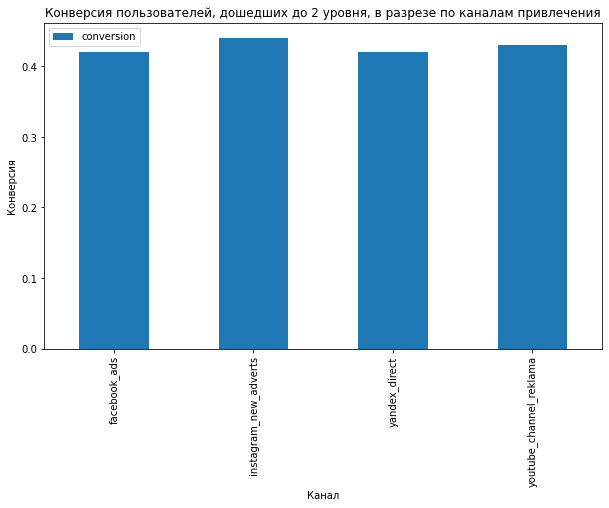

In [59]:
convers.plot(
    x="source",
    y="conversion",
    kind="bar",
    title="Конверсия пользователей, дошедших до 2 уровня, в разрезе по каналам привлечения",
    xlabel="Канал",
    ylabel="Конверсия",
    figsize=[10, 6],
)
plt.show()

Больше всего конверсия пользователей, дошедших до 2 уровня, у канала `youtube_channel_reklama`.

Также посмотрим конверсию пользователей с разибкой по стратегиям прохождения 1 уровня.

In [60]:
convers_win = (
    game_stat.query('event == "finished_stage_1" and event != "project"')
    .groupby("source")
    .agg({"user_id": "nunique"})
    .reset_index()
)

In [61]:
convers_project = (
    game_stat.query('event != "finished_stage_1" and event == "project"')
    .groupby("source")
    .agg({"user_id": "nunique"})
    .reset_index()
)

In [62]:
convers_project

,source,user_id
0,facebook_ads,391
1,instagram_new_adverts,476
2,yandex_direct,620
3,youtube_channel_reklama,379


In [63]:
convers_project["conversion_project"] = round(
    convers_project["user_id"]
    / game_stat.groupby("source").agg({"user_id": "nunique"}).reset_index()["user_id"],
    2,
)

In [64]:
convers_project = convers_project.rename(columns={"user_id": "count_users"})

In [65]:
convers_win['count_users'] = convers_win['user_id'] - convers_project['count_users']

In [66]:
convers_win["conversion_win"] = round(
    convers_win["count_users"]
    / game_stat.groupby("source").agg({"user_id": "nunique"}).reset_index()["user_id"],
    2,
)

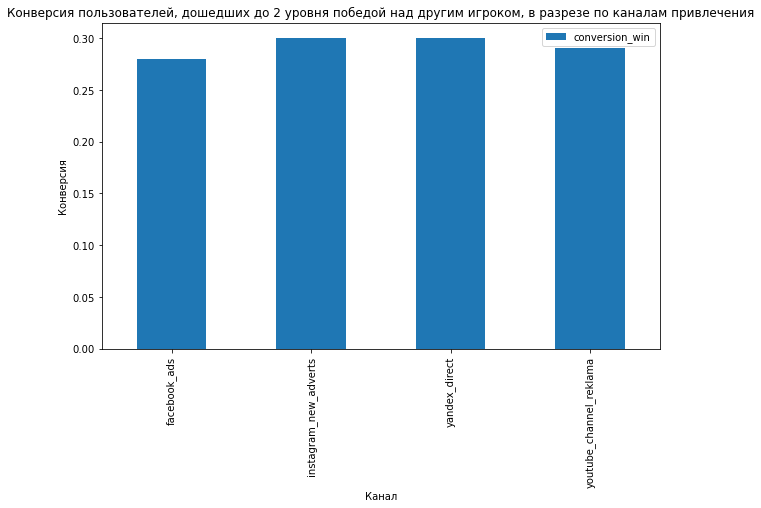

In [67]:
convers_win.plot(
    x="source",
    y="conversion_win",
    kind="bar",
    title="Конверсия пользователей, дошедших до 2 уровня победой над другим игроком, в разрезе по каналам привлечения",
    xlabel="Канал",
    ylabel="Конверсия",
    figsize=[10, 6],
)
plt.show()

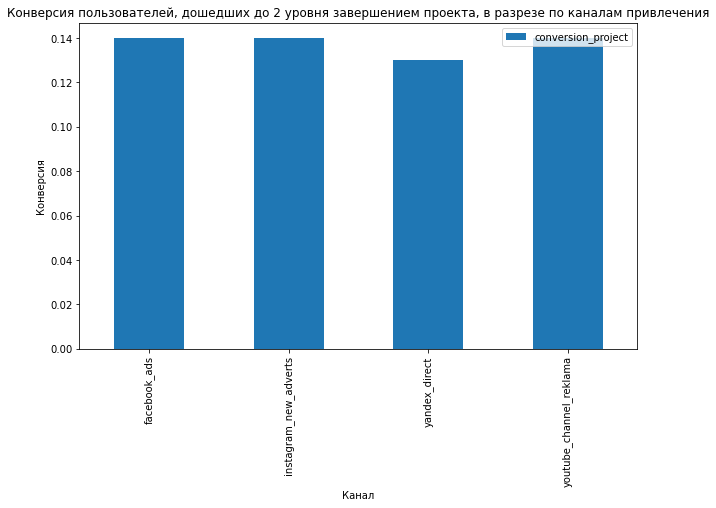

In [68]:
convers_project.plot(
    x="source",
    y="conversion_project",
    kind="bar",
    title="Конверсия пользователей, дошедших до 2 уровня завершением проекта, в разрезе по каналам привлечения",
    xlabel="Канал",
    ylabel="Конверсия",
    figsize=[10, 6],
)
plt.show()

Конверсия пользователей, которые завершили 1 уровень победой над другим игроком, выше, чем у тех пользователей, которые дошли до 2 уровня завершением проекта.

### Вывод

57 процентов игроков доходят до 2 уровня: 14% через реализацию проекта и 43% через победу над другим игроком. ROI выше всего у канала `youtube_channel_reklama`. Это может быть связано с меньшими затратами на рекламу для этого источника.

## Проверка гипотез.

<a id='12-bullet'></a>
### Проверка статистических гипотез.

Проверим некоторые гипотезы:
* Время прохождения уровня между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком, различны.
* Время прохождения уровня между пользователями, привлеченных из разных рекламных источников, различны.

Проверим первую гипотезу. Нулевая гипотеза будет выглядеть следующим образом: средние двух генеральных совокупностей равны между собой. Алтернативная: средние двух генеральных совокупностей не равны между собой. Чтобы подтвердить или опровергнуть нулевую гипотезу проведем t-тест для проверки равенства среднего двух генеральных совокупностей по взятым из них выборкам.

In [69]:
winners = game_stat[game_stat['event']!='building']

In [70]:
winners.head()

,event_datetime,event,building_type,user_id,project_type,source
6659,2020-05-04,finished_stage_1,NaN,ced7b368-818f-48f6-9461-2346de0892c5,NaN,instagram_new_adverts
13134,2020-05-05,finished_stage_1,NaN,7ef7fc89-2779-46ea-b328-9e5035b83af5,NaN,facebook_ads
15274,2020-05-05,finished_stage_1,NaN,70db22b3-c2f4-43bc-94ea-51c8d2904a29,NaN,youtube_channel_reklama
16284,2020-05-05,finished_stage_1,NaN,903fc9ef-ba97-4b12-9d5c-ac8d602fbd8b,NaN,youtube_channel_reklama
19650,2020-05-06,finished_stage_1,NaN,58e077ba-feb1-4556-a5a0-d96bd04efa39,NaN,facebook_ads


In [71]:
first_action = (
    game_actions.sort_values(by=["user_id", "event_datetime"])
    .groupby("user_id")
    .agg(
        {
            "event_datetime": "first",
        }
    )
    .rename(columns={"event_datetime": "first_ts"})
    .reset_index()
)

In [72]:
last_action = (
    game_actions.sort_values(by=["user_id", "event_datetime"])
    .groupby("user_id")
    .agg(
        {
            "event_datetime": "last",
        }
    )
    .rename(columns={"event_datetime": "last_ts"})
    .reset_index()
)

In [73]:
sessions = last_action.merge(first_action, how='left', on='user_id')

In [74]:
sessions['time_finish'] = (sessions['last_ts'] - sessions['first_ts']).dt.days

In [75]:
sessions.head()

,user_id,last_ts,first_ts,time_finish
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,2020-05-20 11:26:06,2020-05-06 01:07:37,14
1,00151b4f-ba38-44a8-a650-d7cf130a0105,2020-05-18 10:46:52,2020-05-06 03:09:12,12
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,2020-05-14 09:21:27,2020-05-05 18:08:52,8
3,001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-12 07:40:47,2020-05-05 21:02:05,6
4,002f508f-67b6-479f-814b-b05f00d4e995,2020-05-22 02:46:45,2020-05-05 13:49:58,16


In [76]:
winners = winners.merge(sessions,how='left',on = 'user_id')

In [77]:
winners.head()

,event_datetime,event,building_type,user_id,project_type,source,last_ts,first_ts,time_finish
0,2020-05-04,finished_stage_1,NaN,ced7b368-818f-48f6-9461-2346de0892c5,NaN,instagram_new_adverts,2020-05-04 19:47:29,2020-05-04 00:13:21,0
1,2020-05-05,finished_stage_1,NaN,7ef7fc89-2779-46ea-b328-9e5035b83af5,NaN,facebook_ads,2020-05-05 13:22:09,2020-05-04 00:22:48,1
2,2020-05-05,finished_stage_1,NaN,70db22b3-c2f4-43bc-94ea-51c8d2904a29,NaN,youtube_channel_reklama,2020-05-05 18:54:37,2020-05-04 13:41:55,1
3,2020-05-05,finished_stage_1,NaN,903fc9ef-ba97-4b12-9d5c-ac8d602fbd8b,NaN,youtube_channel_reklama,2020-05-05 21:27:29,2020-05-04 00:57:02,1
4,2020-05-06,finished_stage_1,NaN,58e077ba-feb1-4556-a5a0-d96bd04efa39,NaN,facebook_ads,2020-05-06 06:02:22,2020-05-04 19:23:40,1


In [78]:
results=st.ttest_ind(
    winners.query('event=="finished_stage_1"')['time_finish'], 
    winners.query('event=="project"')['time_finish'])
alpha = 0.01
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.443946833041278e-51
Отвергаем нулевую гипотезу


In [79]:
(
    winners.query('event=="finished_stage_1"')["time_finish"].mean()
    / winners.query('event=="project"')["time_finish"].mean()
) - 1

-0.12349035938852782

Среднее время прохождения 1 уровня у игроков, победивших другого игрока, на 12 процентов меньше, чем у игроков, завершивших 1 уровень через реализацию проекта.

Далее проверим следущую гипотезу. Нулевая гипотеза будет выглядеть следующим образом: средние двух генеральных совокупностей равны между собой. Алтернативная: средние двух генеральных совокупностей не равны между собой. Чтобы подтвердить или опровергнуть нулевую гипотезу проведем t-тест для проверки равенства среднего двух генеральных совокупностей по взятым из них выборкам.

In [80]:
def stat_diff(first_group, second_group, alpha):
    results=st.ttest_ind(
        winners.query('source==@first_group')['time_finish'], 
        winners.query('source==@second_group')['time_finish'])
    alpha = alpha
    print('p-значение:', results.pvalue)

    if results.pvalue < alpha:
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не получилось отвергнуть нулевую гипотезу")

In [81]:
stat_diff('instagram_new_adverts', 'facebook_ads', 0.05)

p-значение: 0.6380589494635842
Не получилось отвергнуть нулевую гипотезу


In [82]:
(
    winners.query('source=="instagram_new_adverts"')["time_finish"].mean()
    / winners.query('source=="facebook_ads"')["time_finish"].mean()
) - 1


0.005427781982971336

Среднее время прохождения уровня практически не различается между источниками `instagram_new_adverts` и `facebook_ads`.

In [83]:
stat_diff('instagram_new_adverts', 'youtube_channel_reklama', 0.05)

p-значение: 0.9838810313132648
Не получилось отвергнуть нулевую гипотезу


In [84]:
(
    winners.query('source=="instagram_new_adverts"')["time_finish"].mean()
    / winners.query('source=="youtube_channel_reklama"')["time_finish"].mean()
) - 1


-0.0002309884696269915

Среднее время прохождения уровня практически не различается между источниками `instagram_new_adverts` и `youtube_channel_reklama`.

In [85]:
stat_diff('instagram_new_adverts', 'yandex_direct', 0.05)

p-значение: 0.290201801303946
Не получилось отвергнуть нулевую гипотезу


In [86]:
(
    winners.query('source=="instagram_new_adverts"')["time_finish"].mean()
    / winners.query('source=="yandex_direct"')["time_finish"].mean()
) - 1

0.0109140237344858

Среднее время прохождения уровня практически не различается между источниками `instagram_new_adverts` и `yandex_direct`.

In [87]:
stat_diff('facebook_ads', 'yandex_direct', 0.05)

p-значение: 0.623768856906332
Не получилось отвергнуть нулевую гипотезу


In [88]:
(
    winners.query('source=="facebook_ads"')["time_finish"].mean()
    / winners.query('source=="yandex_direct"')["time_finish"].mean()
) - 1

0.005456624383995079

Среднее время прохождения уровня практически не различается между источниками `facebook_ads` и `yandex_direct`.

In [89]:
stat_diff('facebook_ads', 'youtube_channel_reklama', 0.05)

p-значение: 0.6425981516125452
Не получилось отвергнуть нулевую гипотезу


In [90]:
(
    winners.query('source=="facebook_ads"')["time_finish"].mean()
    / winners.query('source=="youtube_channel_reklama"')["time_finish"].mean()
) - 1

-0.0056282216923005945

Среднее время прохождения уровня практически не различается между источниками `facebook_ads` и `youtube_channel_reklama`.

In [91]:
stat_diff('yandex_direct', 'youtube_channel_reklama', 0.05)

p-значение: 0.31507396375179886
Не получилось отвергнуть нулевую гипотезу


In [92]:
(
    winners.query('source=="yandex_direct"')["time_finish"].mean()
    / winners.query('source=="youtube_channel_reklama"')["time_finish"].mean()
) - 1

-0.011024688492243029

При уровне значимости в 0.05 есть риск получить ложноположительный результат при множественной проверке гипотез. Поэтому следует понизить уровень значимости. Далее изменим уровень значимости до 0.01. 

In [93]:
stat_diff('instagram_new_adverts', 'facebook_ads', 0.01)

p-значение: 0.6380589494635842
Не получилось отвергнуть нулевую гипотезу


In [94]:
stat_diff('instagram_new_adverts', 'youtube_channel_reklama', 0.01)

p-значение: 0.9838810313132648
Не получилось отвергнуть нулевую гипотезу


In [95]:
stat_diff('instagram_new_adverts', 'yandex_direct', 0.01)

p-значение: 0.290201801303946
Не получилось отвергнуть нулевую гипотезу


In [96]:
stat_diff('facebook_ads', 'yandex_direct', 0.01)

p-значение: 0.623768856906332
Не получилось отвергнуть нулевую гипотезу


In [97]:
stat_diff('facebook_ads', 'youtube_channel_reklama', 0.01)

p-значение: 0.6425981516125452
Не получилось отвергнуть нулевую гипотезу


In [98]:
stat_diff('yandex_direct', 'youtube_channel_reklama', 0.01)

p-значение: 0.31507396375179886
Не получилось отвергнуть нулевую гипотезу


Среднее время прохождения уровня практически не различается между источниками `yandex_direct` и `youtube_channel_reklama`.

### Вывод

Среднее время прохождения 1 уровня у игроков, победивших другого игрока, на 12 процентов меньше, чем у игроков, завершивших 1 уровень через реализацию проекта. Источник привлечения пользователей не влияет на время прохождения игроками первого уровня.

## Вывод

Исходя из данных, приведенных выше можно сделать вывод, что затраты на рекламу окупаются у источников `yandex_direct`, `youtube_channel_reklama` и `instagram_new_adverts`. Время прохождения 1 уровня меньше всего у пользователей, победивших другого игрока, чем у игроков, выполнивших реализацию проекта. Источник привлчения не влияет на время прохождения 1 уровня.

Судя по распределению построек пользователей, многие пользователи не строят больше 7 строений. Также можно заметить, что конверсия пользователей, завершивших 1 уровень победой над другим игроком, выше, чем у исследователей. Из этого можно сделать вывод, что если показывать рекламу меньше, то с увеличением конверсии можно увеличить и окупаемость рекламы.

Также стоит больше вкладывать средств в `yandex_direct` и `youtube_channel_reklama`, так как у них больше всего показатель ROI